# Importação das Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import os
from pathlib import Path

# Leitura do CSV

In [2]:
DADOS = r"..\dados\vendas_hashtech.csv"

df_vendas = pd.read_csv(DADOS)

df_vendas.head()

,data,produto,regiao,quantidade,preco_unitario,faturamento
0,2024-01-01,Mouse,Nordeste,4,127.11,508.43
1,2024-01-01,SSD,Norte,4,504.74,2018.95
2,2024-01-01,SSD,Norte,4,381.00,1524.01
3,2024-01-01,Mouse,Nordeste,6,111.57,669.39
4,2024-01-01,Mouse,Sudeste,6,117.90,707.38


# Verificação dos Dados

In [3]:
# Tipos dos dados
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            3385 non-null   object 
 1   produto         3385 non-null   object 
 2   regiao          3385 non-null   object 
 3   quantidade      3385 non-null   int64  
 4   preco_unitario  3385 non-null   float64
 5   faturamento     3385 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 158.8+ KB


In [4]:
# Conversão da coluna de data para datetime
df_vendas['data'] = pd.to_datetime(df_vendas['data'])

# Nova verificação dos tipos dos dados para verificar a coluna de data
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            3385 non-null   datetime64[ns]
 1   produto         3385 non-null   object        
 2   regiao          3385 non-null   object        
 3   quantidade      3385 non-null   int64         
 4   preco_unitario  3385 non-null   float64       
 5   faturamento     3385 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 158.8+ KB


In [5]:
# Definição das colunas numéricas e categóricas
colunas_numericas = df_vendas.select_dtypes(include='number').columns
colunas_categoricas = df_vendas.select_dtypes(exclude='number').columns

print(colunas_numericas)
print(colunas_categoricas) 

Index(['quantidade', 'preco_unitario', 'faturamento'], dtype='object')
Index(['data', 'produto', 'regiao'], dtype='object')


In [6]:
# Exclusão da coluna 'data' das colunas categóricas
colunas_categoricas = colunas_categoricas.drop('data')
print(colunas_categoricas)

Index(['produto', 'regiao'], dtype='object')


In [7]:
# Verificação de valores estatísticos
df_vendas_num = df_vendas.select_dtypes(include='number').drop(columns=['data'], errors='ignore')
df_vendas_num.describe()

,quantidade,preco_unitario,faturamento
count,3385.000000,3385.000000,3385.000000
mean,4.514032,743.294780,2873.747247
std,2.423388,713.555738,3177.546138
min,1.000000,61.160000,91.980000
25%,3.000000,138.280000,773.110000
50%,4.000000,458.020000,1747.800000
75%,6.000000,1667.230000,3534.040000
max,16.000000,2434.640000,20127.670000


In [8]:
# Verificação de valores estatísticos das colunas qualitativas
df_vendas_cat = df_vendas.drop(columns=['data'])
df_vendas_cat.describe(exclude='number')

,produto,regiao
count,3385,3385
unique,3,5
top,SSD,Nordeste
freq,1374,727


# Construção dos Gráficos

## Calculando o Faturamento Mensal

In [9]:
df_vendas_mensais = (
    df_vendas
    .groupby(df_vendas['data'].dt.to_period('M'))['faturamento']
    .sum()
    .reset_index()
)

df_vendas_mensais.head()

,data,faturamento
0,2024-01,886562.25
1,2024-02,918955.04
2,2024-03,918785.07
3,2024-04,1033518.28
4,2024-05,922954.53


In [10]:
df_vendas_mensais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   data         12 non-null     period[M]
 1   faturamento  12 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 324.0 bytes


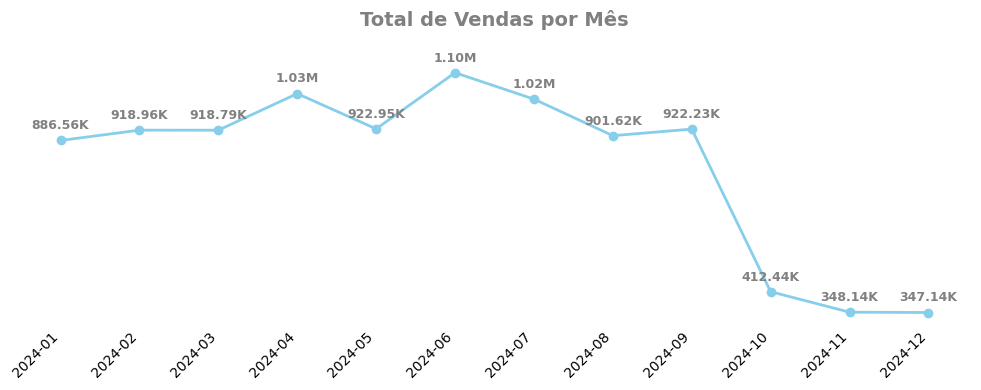

In [42]:
# dados
x = df_vendas_mensais["data"].astype(str)
y = df_vendas_mensais["faturamento"]

# cores
cores = plt.get_cmap('Pastel1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 4))

# Adicionar linha
ax.plot(x, y, marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=6, label="Venda Total")

# Título
ax.set_title("Total de Vendas por Mês", fontsize=14, fontweight='bold', color='gray', pad=25)

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionar valores no gráfico
def formatar_valor(v):
    if v >= 1_000_000:
        return f'{v/1_000_000:.2f}M'
    elif v >= 1_000:
        return f'{v/1_000:.2f}K'
    else:
        return str(int(v))

for i, valor in enumerate(y):
    ax.annotate(formatar_valor(valor), (x[i], y[i]), textcoords="offset points", xytext=(0, 8),
                ha='center', fontsize=9, color='gray', fontweight='bold')

# Tirar as bordas dos eixos
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remover o eixo Y
ax.set_yticks([])

# Remover os tracinhos do eixo X
ax.tick_params(axis="x", length=0) 

# Ajustar layout
plt.tight_layout()

# salvando a figura
plt.savefig('../plots/plots_python/faturamento_mensal.png', dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

## Calculando o Faturamento Mensal por Produto

In [15]:
df_vendas_mensais_produto = (
    df_vendas
    .groupby([df_vendas['data'].dt.to_period('M'), 'produto'])['faturamento']
    .sum()
    .reset_index()
)

df_vendas_mensais_produto.head(8)

,data,produto,faturamento
0,2024-01,Mouse,71847.26
1,2024-01,Placa de Vídeo,533706.43
2,2024-01,SSD,281008.56
3,2024-02,Mouse,59108.65
4,2024-02,Placa de Vídeo,625080.45
5,2024-02,SSD,234765.94
6,2024-03,Mouse,72878.35
7,2024-03,Placa de Vídeo,582711.71


In [19]:
df_pivot = df_vendas_mensais_produto.pivot(
    index='data',       # meses viram índice (linhas)
    columns='produto',  # produtos viram colunas
    values='faturamento'  # valores nas células
).fillna(0)

df_pivot.head()

produto,Mouse,Placa de Vídeo,SSD
data,,,
2024-01,71847.26,533706.43,281008.56
2024-02,59108.65,625080.45,234765.94
2024-03,72878.35,582711.71,263195.01
2024-04,53946.87,723974.63,255596.78
2024-05,70184.60,601338.08,251431.85


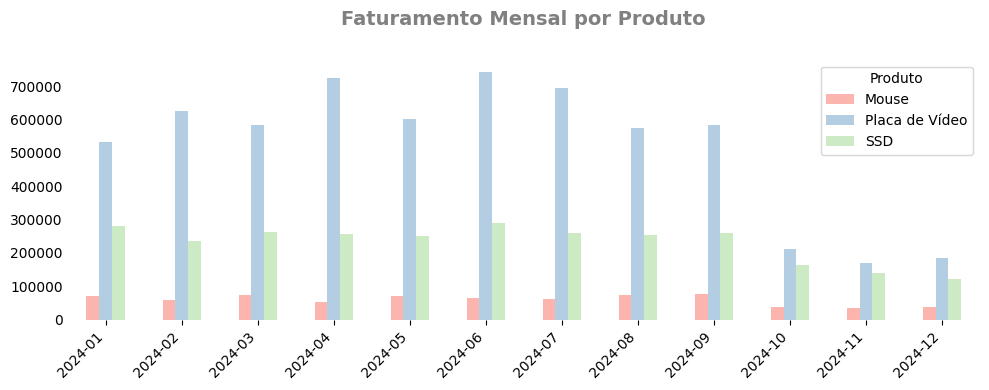

In [41]:
# cores
cores = plt.get_cmap('Pastel1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

# Criar gráfico
ig, ax = plt.subplots(figsize=(10, 4))
df_pivot.plot(kind='bar', ax=ax)

# Título do gráfico
ax.set_title('Faturamento Mensal por Produto', fontsize=14, fontweight='bold', color='gray', pad=25)

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionar valores no gráfico
def formatar_valor(v):
    if v >= 1_000_000:
        return f'{v/1_000_000:.2f}M'
    elif v >= 1_000:
        return f'{v/1_000:.2f}K'
    else:
        return str(int(v))

# Tirar as bordas dos eixos
plt.box(False)

# Tirar o nome do eixo X
ax.set_xlabel('')
# Tirar o nome do eixo y
ax.set_ylabel('')

# Título da leggenda
plt.legend(title='Produto')

# Remover o eixo x
# ax.set_xticks([])

# Remover os tracinhos do eixo y
ax.tick_params(axis="y", length=0) 

# Ajustar layout
plt.tight_layout()

# salvando a figura
plt.savefig('../plots/plots_python/faturamento_mensal_produto.png', dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

## Calculando o Preço Médio dos Produtos

In [51]:
df_preco_medio_produto = (
    df_vendas
    .groupby([df_vendas['data'].dt.to_period('M'), 'produto'])['preco_unitario']
    .mean()
    .reset_index()
)

df_preco_medio_produto.head(8)

,data,produto,preco_unitario
0,2024-01,Mouse,118.700392
1,2024-01,Placa de Vídeo,1803.231714
2,2024-01,SSD,452.834667
3,2024-02,Mouse,120.557531
4,2024-02,Placa de Vídeo,1794.601724
5,2024-02,SSD,445.991441
6,2024-03,Mouse,120.986792
7,2024-03,Placa de Vídeo,1782.252500


In [52]:
df_pivot = df_preco_medio_produto.pivot(
    index='data',      
    columns='produto', 
    values='preco_unitario' 
).fillna(0)

df_pivot.head()

produto,Mouse,Placa de Vídeo,SSD
data,,,
2024-01,118.700392,1803.231714,452.834667
2024-02,120.557531,1794.601724,445.991441
2024-03,120.986792,1782.252500,459.669008
2024-04,119.807125,1795.046630,444.102719
2024-05,117.664835,1811.596265,447.516964


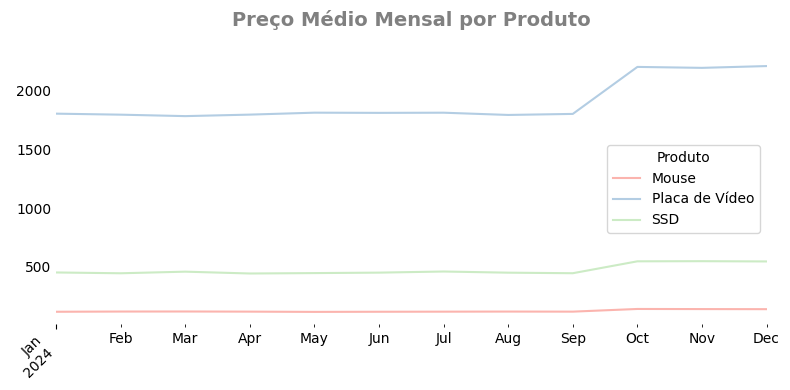

In [57]:
# cores
cores = plt.get_cmap('Pastel1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Plotar gráfico de linhas
df_pivot.plot(ax=ax)

# Título do gráfico
ax.set_title('Preço Médio Mensal por Produto', fontsize=14, fontweight='bold', color='gray', pad=20)

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=45, ha='right')

# Tirar as bordas dos eixos
plt.box(False)

# Tirar o nome do eixo X
ax.set_xlabel('')
# Tirar o nome do eixo y
ax.set_ylabel('')

# Título da leggenda
plt.legend(title='Produto')

# Remover os tracinhos do eixo y
ax.tick_params(axis="y", length=0) 

# Ajustar layout
plt.tight_layout()

# Salvar imagem
fig.savefig('../plots/plots_python/preco_medio_produtos.png', dpi=300, bbox_inches='tight')

# Mostrar gráfico
plt.show()